In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F

In [2]:
iris_data_loc = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris_data_loc, index_col=None, header=None, encoding='utf-8')
df.columns = ['x1', 'x2', 'x3', 'x4', 'labels']
print(df.head())

    x1   x2   x3   x4       labels
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [3]:
class_labels = df['labels'].unique()
label_to_int = lambda x: np.where(class_labels == x)[0][0]
df['int_labels'] = df['labels'].apply(label_to_int)

# y_np = df['int_labels'].values
# X_np = df[['x1', 'x2', 'x3', 'x4']].values

In [4]:
# from sklearn.model_selection import train_test_split
# X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_np, y_np, stratify=y, test_size=0.3, random_state=42, shuffle=True)
# X_train = torch.from_numpy(X_train_np)
# y_train = torch.from_numpy(y_train_np)
# X_test = torch.from_numpy(X_test_np)
# y_test = torch.from_numpy(y_test_np)

X = torch.tensor(df[['x1', 'x2', 'x3', 'x4']].values, dtype=torch.float)
y = torch.tensor(df['int_labels'].values, dtype=torch.int)

In [5]:
torch.manual_seed(42)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)
X, y = X[shuffle_idx], y[shuffle_idx]

percent70 = int(shuffle_idx.size(0)*0.7)
X_train, X_test = X[shuffle_idx[:percent70]], X[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

In [6]:
mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

In [7]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_train, X_test = X_train.to(DEVICE), X_test.to(DEVICE)
y_train, y_test = y_train.to(DEVICE), y_test.to(DEVICE)

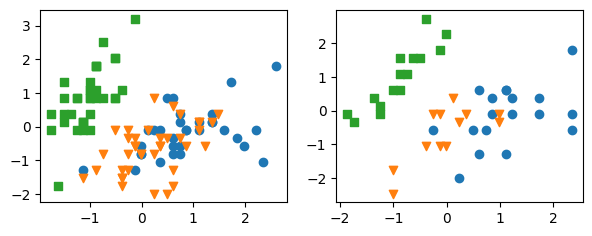

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))
ax[0].scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1])
ax[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker='v')
ax[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], marker='s')
ax[1].scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1])
ax[1].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], marker='v')
ax[1].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], marker='s')
plt.show()

In [ ]:
from multiclass_logistic_torch_low_level import MulticlassSoftmax

mod = MulticlassSoftmax(num_features=4, num_classes=3, DEVICE=DEVICE)

In [10]:
costs = mod.train(X_train, y_train, num_epochs=1000, learning_rate=0.01)

Epoch: 001 | Train ACC: 0.771Epoch: 001 | Train ACC: 0.771 | Cost: 1.089
Epoch: 002 | Train ACC: 0.781Epoch: 002 | Train ACC: 0.781 | Cost: 1.080
Epoch: 003 | Train ACC: 0.781Epoch: 003 | Train ACC: 0.781 | Cost: 1.071
Epoch: 004 | Train ACC: 0.781Epoch: 004 | Train ACC: 0.781 | Cost: 1.063
Epoch: 005 | Train ACC: 0.781Epoch: 005 | Train ACC: 0.781 | Cost: 1.054
Epoch: 006 | Train ACC: 0.781Epoch: 006 | Train ACC: 0.781 | Cost: 1.046
Epoch: 007 | Train ACC: 0.781Epoch: 007 | Train ACC: 0.781 | Cost: 1.037
Epoch: 008 | Train ACC: 0.790Epoch: 008 | Train ACC: 0.790 | Cost: 1.029
Epoch: 009 | Train ACC: 0.790Epoch: 009 | Train ACC: 0.790 | Cost: 1.021
Epoch: 010 | Train ACC: 0.790Epoch: 010 | Train ACC: 0.790 | Cost: 1.014
Epoch: 011 | Train ACC: 0.790Epoch: 011 | Train ACC: 0.790 | Cost: 1.006
Epoch: 012 | Train ACC: 0.790Epoch: 012 | Train ACC: 0.790 | Cost: 0.998
Epoch: 013 | Train ACC: 0.790Epoch: 013 | Train ACC: 0.790 | Cost: 0.991
Epoch: 014 | Train ACC: 0.790Epoch: 014 | Train ACC

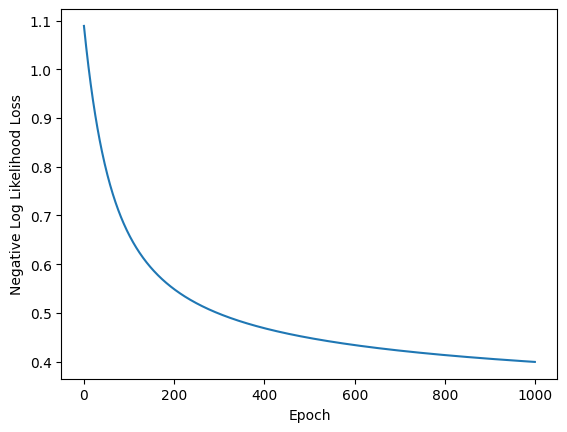

In [11]:
plt.plot(costs)
plt.ylabel('Negative Log Likelihood Loss')
plt.xlabel('Epoch')
plt.show()

In [12]:
print('Test accuracy: %.2f%%' %(mod.evaluate(X_test, y_test)))

Test accuracy: 0.80%


In [14]:
from multiclass_softmax_torch import MulticlassSoftmaxTorch

mst = MulticlassSoftmaxTorch(num_features=4, num_classes=3, DEVICE=DEVICE)
mst_costs = mst.train(X_train, y_train, num_epochs=1000, learning_rate=0.1)

Epoch: 001 | Train ACC: 0.810 | Loss: 1.099
Epoch: 010 | Train ACC: 0.829 | Loss: 0.671
Epoch: 020 | Train ACC: 0.829 | Loss: 0.541
Epoch: 030 | Train ACC: 0.867 | Loss: 0.479
Epoch: 040 | Train ACC: 0.886 | Loss: 0.440
Epoch: 050 | Train ACC: 0.886 | Loss: 0.412
Epoch: 060 | Train ACC: 0.886 | Loss: 0.391
Epoch: 070 | Train ACC: 0.886 | Loss: 0.374
Epoch: 080 | Train ACC: 0.886 | Loss: 0.360
Epoch: 090 | Train ACC: 0.886 | Loss: 0.347
Epoch: 100 | Train ACC: 0.886 | Loss: 0.336
Epoch: 110 | Train ACC: 0.905 | Loss: 0.326
Epoch: 120 | Train ACC: 0.905 | Loss: 0.317
Epoch: 130 | Train ACC: 0.905 | Loss: 0.308
Epoch: 140 | Train ACC: 0.905 | Loss: 0.301
Epoch: 150 | Train ACC: 0.905 | Loss: 0.293
Epoch: 160 | Train ACC: 0.905 | Loss: 0.287
Epoch: 170 | Train ACC: 0.914 | Loss: 0.280
Epoch: 180 | Train ACC: 0.924 | Loss: 0.274
Epoch: 190 | Train ACC: 0.933 | Loss: 0.269
Epoch: 200 | Train ACC: 0.943 | Loss: 0.263
Epoch: 210 | Train ACC: 0.943 | Loss: 0.258
Epoch: 220 | Train ACC: 0.943 | 

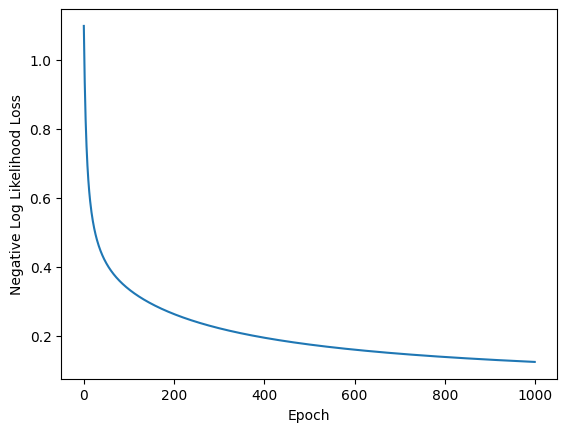

In [15]:
plt.plot(mst_costs)
plt.ylabel('Negative Log Likelihood Loss')
plt.xlabel('Epoch')
plt.show()